## Problem Definition

Apply regression analysis to find the price per night for Montreal accomodation on https://www.airbnb.ca/

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

#### Load the data

In [2]:
df=pd.read_csv("MontrealAirB&B_cleaned_processed.csv")
df.head()

,Unnamed: 0,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,Le Plateau-Mont-Royal,45.530692,-73.585878,Private room,39,2,228
1,1,Le Sud-Ouest,45.484419,-73.579225,Private room,30,1,266
2,2,Le Plateau-Mont-Royal,45.541353,-73.578139,Entire home/apt,147,3,356
3,3,Ville-Marie,45.518885,-73.565463,Entire home/apt,94,3,319
4,4,Ville-Marie,45.520195,-73.564219,Entire home/apt,145,4,363


In [3]:
df.describe()

,Unnamed: 0,latitude,longitude,price,minimum_nights,availability_365
count,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000
mean,9712.556190,45.516048,-73.588399,110.693385,8.938327,122.315006
std,5608.086386,0.029525,0.040045,243.671041,94.463274,133.877886
min,0.000000,45.401166,-73.954626,0.000000,1.000000,0.000000
25%,4856.000000,45.499147,-73.601905,50.000000,1.000000,0.000000
50%,9713.000000,45.519110,-73.579396,80.000000,2.000000,70.000000
75%,14569.000000,45.533296,-73.566513,120.000000,3.000000,255.000000
max,19425.000000,45.693663,-73.481893,12999.000000,11684.000000,365.000000


In [4]:
df.dtypes

Unnamed: 0            int64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price                 int64
minimum_nights        int64
availability_365      int64
dtype: object

In [5]:
print(df["room_type"].unique())
print(df["neighbourhood"].unique())
print(df["neighbourhood"].unique().size)

['Private room' 'Entire home/apt' 'Shared room']
['Le Plateau-Mont-Royal' 'Le Sud-Ouest' 'Ville-Marie'
 'Rosemont-La Petite-Patrie' 'Verdun' 'Mercier-Hochelaga-Maisonneuve'
 'Côte-des-Neiges-Notre-Dame-de-Grâce' 'Dorval' 'Montréal-Ouest'
 'Villeray-Saint-Michel-Parc-Extension' 'Outremont' 'Beaconsfield'
 "Baie-d'Urfé" 'Mont-Royal' 'Saint-Léonard' 'Saint-Laurent' 'LaSalle'
 'Ahuntsic-Cartierville' 'Lachine' 'Côte-Saint-Luc'
 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Westmount' 'Montréal-Nord'
 'Pierrefonds-Roxboro' 'Hampstead' 'Pointe-Claire' 'Anjou'
 'Dollard-des-Ormeaux' 'Kirkland' "L'Île-Bizard-Sainte-Geneviève"
 'Montréal-Est' 'Sainte-Anne-de-Bellevue']
32


#### Feature engineering

We will make prediction of field 'price' vs fields 'neighbourhood', 'room_type' and 'minimum_nights'. First two fields are categorical data, that we have to convert to numeric ones

In [6]:
dfnew = df
dfnew.head()

,Unnamed: 0,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,Le Plateau-Mont-Royal,45.530692,-73.585878,Private room,39,2,228
1,1,Le Sud-Ouest,45.484419,-73.579225,Private room,30,1,266
2,2,Le Plateau-Mont-Royal,45.541353,-73.578139,Entire home/apt,147,3,356
3,3,Ville-Marie,45.518885,-73.565463,Entire home/apt,94,3,319
4,4,Ville-Marie,45.520195,-73.564219,Entire home/apt,145,4,363


In [7]:
dfnew = pd.concat([dfnew, pd.get_dummies(dfnew.neighbourhood)], axis=1)
dfnew = pd.concat([dfnew, pd.get_dummies(dfnew.room_type)], axis=1)
dfnew.head()

,Unnamed: 0,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,Ahuntsic-Cartierville,Anjou,...,Saint-Laurent,Saint-Léonard,Sainte-Anne-de-Bellevue,Verdun,Ville-Marie,Villeray-Saint-Michel-Parc-Extension,Westmount,Entire home/apt,Private room,Shared room
0,0,Le Plateau-Mont-Royal,45.530692,-73.585878,Private room,39,2,228,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,Le Sud-Ouest,45.484419,-73.579225,Private room,30,1,266,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,Le Plateau-Mont-Royal,45.541353,-73.578139,Entire home/apt,147,3,356,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Ville-Marie,45.518885,-73.565463,Entire home/apt,94,3,319,0,0,...,0,0,0,0,1,0,0,1,0,0
4,4,Ville-Marie,45.520195,-73.564219,Entire home/apt,145,4,363,0,0,...,0,0,0,0,1,0,0,1,0,0


In [8]:
X_columns=['Private room', 'Entire home/apt', 'Shared room', 
           'Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Ville-Marie', 
           'Rosemont-La Petite-Patrie', 'Verdun', 'Mercier-Hochelaga-Maisonneuve',
           'Côte-des-Neiges-Notre-Dame-de-Grâce','Dorval','Montréal-Ouest',
           'Villeray-Saint-Michel-Parc-Extension','Outremont','Beaconsfield',
           "Baie-d'Urfé",'Mont-Royal','Saint-Léonard','Saint-Laurent','LaSalle',
           'Ahuntsic-Cartierville','Lachine','Côte-Saint-Luc',
           'Rivière-des-Prairies-Pointe-aux-Trembles','Westmount','Montréal-Nord',
           'Pierrefonds-Roxboro','Hampstead','Pointe-Claire','Anjou',
           'Dollard-des-Ormeaux','Kirkland',"L'Île-Bizard-Sainte-Geneviève",
           'Montréal-Est','Sainte-Anne-de-Bellevue', 
           'minimum_nights']
y_column=['price']

# split the data

threshold = 0.8
X = dfnew[X_columns]
y = dfnew[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (15540, 36)
y_train (15540, 1)
X_test (3885, 36)
y_test (3885, 1)


### Regression Models - Linear Regression, Decision Tree, Random Forest, K-Neighbors
#### Model training

MODEL LinearRegression
MAE 70.75356074115663
RMSE 411.39269912030807


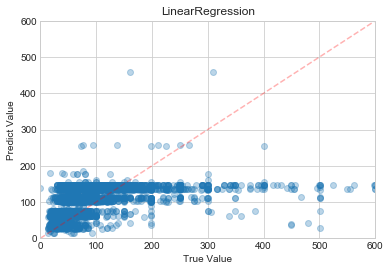

Feature Importance
                                           0           1
15                               Baie-d'Urfé  314.874153
27                                 Hampstead  115.715673
23  Rivière-des-Prairies-Pointe-aux-Trembles  111.461254
1                            Entire home/apt   51.581326
10                                    Dorval   34.989288

MODEL RandomForestRegressor10
MAE 71.25179449667148
RMSE 413.62896737454736


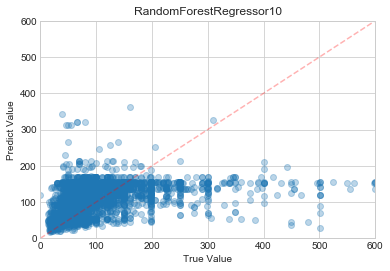

Feature Importance
                                           0         1
35                            minimum_nights  0.394439
1                            Entire home/apt  0.349026
3                      Le Plateau-Mont-Royal  0.072977
23  Rivière-des-Prairies-Pointe-aux-Trembles  0.036181
5                                Ville-Marie  0.032803

MODEL RandomForestRegressor100
MAE 71.07280222624858
RMSE 412.99861732292953


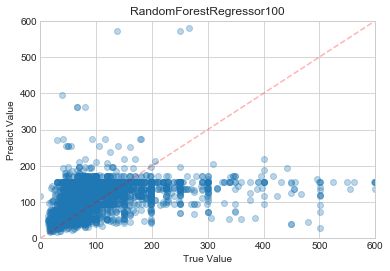

Feature Importance
                                           0         1
35                            minimum_nights  0.378031
1                            Entire home/apt  0.370757
23  Rivière-des-Prairies-Pointe-aux-Trembles  0.052417
3                      Le Plateau-Mont-Royal  0.041437
5                                Ville-Marie  0.035927

MODEL KNeighborsRegressor
MAE 96.11140283140284
RMSE 421.94223130490093


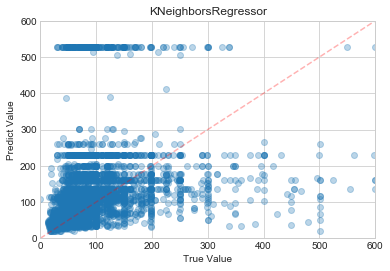


MODEL DecisionTreeRegressor
MAE 71.4600554249942
RMSE 413.91275268072496


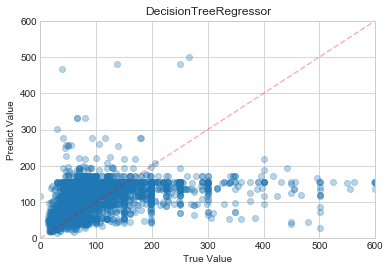

Feature Importance
                                           0         1
1                            Entire home/apt  0.414034
35                            minimum_nights  0.357343
23  Rivière-des-Prairies-Pointe-aux-Trembles  0.053468
5                                Ville-Marie  0.038721
3                      Le Plateau-Mont-Royal  0.031093



,model,mae,rmse
0,LinearRegression,70.753561,411.392699
2,RandomForestRegressor100,71.072802,412.998617
1,RandomForestRegressor10,71.251794,413.628967
4,DecisionTreeRegressor,71.460055,413.912753
3,KNeighborsRegressor,96.111403,421.942231


In [9]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 600])
    plt.ylim([0, 600])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

#### Cross-Validation

In [10]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


#### Models Evaluation

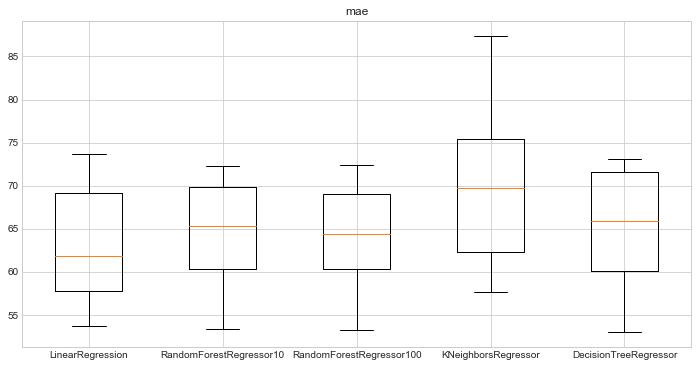

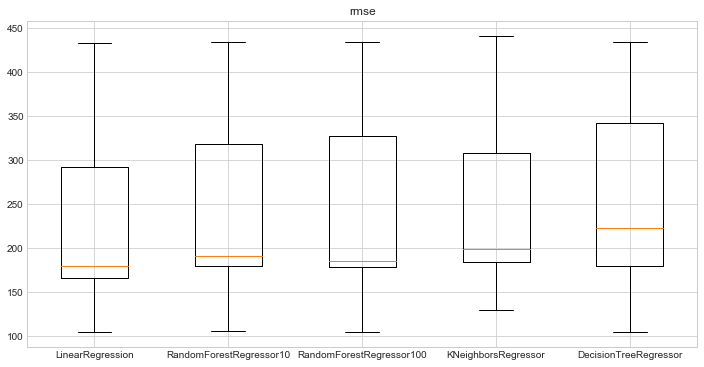

In [11]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

##### CONCLUSION: RandomForestRegressor100 is the best regression model among tested based on MAE (61), RMSE (246) and their distributions. Feature importance found by this model are: minimum_nights (0.616444), Le Plateau-Mont-Royal (0.143427), Entire home/apt (0.110704), Côte-des-Neiges-Notre-Dame-de-Grâce (0.029888), Rivière-des-Prairies-Pointe-aux-Trembles (0.028412).

##### Saving model to file

In [19]:
model = RandomForestRegressor(n_estimators=100, n_jobs=4)
model.fit(X_train, y_train.ravel())
pkl_filename = "forest100_regression.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

### Testing

In [21]:
district = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
room_type = [0,0,0]

input_room = 'Shared room'
input_district = 'Le Sud-Ouest'
min_nights = 2

district_named = ['Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Ville-Marie', 
           'Rosemont-La Petite-Patrie', 'Verdun', 'Mercier-Hochelaga-Maisonneuve',
           'Côte-des-Neiges-Notre-Dame-de-Grâce','Dorval','Montréal-Ouest',
           'Villeray-Saint-Michel-Parc-Extension','Outremont','Beaconsfield',
           "Baie-d'Urfé",'Mont-Royal','Saint-Léonard','Saint-Laurent','LaSalle',
           'Ahuntsic-Cartierville','Lachine','Côte-Saint-Luc',
           'Rivière-des-Prairies-Pointe-aux-Trembles','Westmount','Montréal-Nord',
           'Pierrefonds-Roxboro','Hampstead','Pointe-Claire','Anjou',
           'Dollard-des-Ormeaux','Kirkland',"L'Île-Bizard-Sainte-Geneviève",
           'Montréal-Est','Sainte-Anne-de-Bellevue']
room_type_named = ['Private room', 'Entire home/apt', 'Shared room']

index_room = room_type_named.index(input_room)
room_type[index_room] = 1

index_district = district_named.index(input_district)
district[index_district] = 1

print(room_type)
print(district)
search_result = []
search_result += room_type
search_result += district
search_result.append(min_nights) 
print(search_result)
model = RandomForestRegressor(n_estimators=100, n_jobs=4)
model.fit(X_train, y_train.ravel())
prediction = model.predict([search_result])
# print(prediction)
predicted_price = prediction.round(1)[0]
print(predicted_price)

[0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
63.1
